# IMPORT OF LIBRAIRIES 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *
import urllib.parse
from matplotlib.pyplot import figure
import geoip2.database
import socket
from tld import get_tld

import re
import json
from urllib.request import urlopen
import pygeoip

import matplotlib.ticker as mtick

In [2]:
quotes_all_years = pd.io.json.read_json('Quotebank_climate_attributes/quotes-all-years.json.bz2', lines = True)

In [3]:
quotes_norm = pd.io.json.read_json('Quotebank_climate_attributes/Quote_frequency_day.json', orient = 'index')


In [4]:
quotes_norm['date'] = quotes_norm.index
quotes_norm['count']= quotes_norm[0]
quotes_norm.reset_index(drop = True, inplace = True)
quotes_norm.drop( columns = 0, inplace = True)

In [5]:
quotes_norm

,date,count
0,2015-08-31,67945
1,2015-12-08,87238
2,2015-09-10,84472
3,2015-07-23,88601
4,2015-10-04,43412
...,...,...
1929,2020-03-08,27171
1930,2020-03-28,22781
1931,2020-02-01,39262
1932,2020-04-12,19718


### Creation of a column containing the month when the month when the quote was reported


In [6]:
quotes_all_years['month'] = quotes_all_years['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_all_years

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,date_of_birth,nationality,gender,ethnic_group,occupation,party,religion,month
0,2015-02-09-029204,I want him to be Prime Minister because he sup...,None,[],2015-02-09 04:28:41,1,"[[None, 0.8177], [Malcolm Turnbull, 0.1823]]",[http://sbs.com.au/comedy/article/2015/02/09/w...,E,Monday,None,None,None,None,None,None,None,Feb
1,2015-01-26-037174,It is encouraging that they are backing their ...,None,[],2015-01-26 13:03:00,1,"[[None, 0.7101], [President Obama, 0.2899]]",[http://www.theclimategroup.org/what-we-do/new...,E,Monday,None,None,None,None,None,None,None,Jan
2,2015-07-22-062083,Labor's ambition is to see 50% of our electric...,Bill Shorten,[Q4910865],2015-07-22 01:21:51,2,"[[Bill Shorten, 0.8927], [None, 0.1073]]",[http://feeds.theguardian.com/c/34708/f/663879...,E,Wednesday,+1967-05-12T00:00:00Z,"[Australia, United Kingdom]",male,None,"[politician, lawyer, trade unionist]",Australian Labor Party,None,Jul
3,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,"[Q313025, Q3180862, Q47503507, Q6218074, Q6324...",2015-09-28 23:16:52,1,"[[John Abraham, 0.6469], [None, 0.3092], [Will...",[http://www.desmogblog.com/donors-capital-fund],E,Monday,None,None,None,None,None,None,None,Sep
4,2015-07-28-039461,I suppose Prime Minister Modi will decide at t...,Laurence Tubiana,[Q3218947],2015-07-28 17:39:32,2,"[[Laurence Tubiana, 0.9432], [None, 0.0568]]",[http://economictimes.indiatimes.com/news/poli...,E,Tuesday,+1951-07-05T00:00:00Z,France,female,None,"[economist, university teacher]",None,None,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207031,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21 20:23:47,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,None,Feb
207032,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10 00:00:00,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,None,Apr
207033,2020-04-11-013559,I'm talking about telling the fossil fuel indu...,Bernie Sanders,[Q359442],2020-04-11 04:00:00,2,"[[Bernie Sanders, 0.5636], [None, 0.3044], [Jo...",[https://www.commondreams.org/views/2020/04/11...,E,Saturday,+1941-09-08T00:00:00Z,United States of America,male,Jewish people,"[politician, journalist, carpenter, university...","[Liberty Union Party, Democratic Party, indepe...",Judaism,Apr
207034,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10 11:00:08,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,+1957-06-27T00:00:00Z,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,Feb


In [7]:
quotes_all_years['date'] = quotes_all_years['date'].dt.date

In [8]:
quotes_all_years

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,date_of_birth,nationality,gender,ethnic_group,occupation,party,religion,month
0,2015-02-09-029204,I want him to be Prime Minister because he sup...,None,[],2015-02-09,1,"[[None, 0.8177], [Malcolm Turnbull, 0.1823]]",[http://sbs.com.au/comedy/article/2015/02/09/w...,E,Monday,None,None,None,None,None,None,None,Feb
1,2015-01-26-037174,It is encouraging that they are backing their ...,None,[],2015-01-26,1,"[[None, 0.7101], [President Obama, 0.2899]]",[http://www.theclimategroup.org/what-we-do/new...,E,Monday,None,None,None,None,None,None,None,Jan
2,2015-07-22-062083,Labor's ambition is to see 50% of our electric...,Bill Shorten,[Q4910865],2015-07-22,2,"[[Bill Shorten, 0.8927], [None, 0.1073]]",[http://feeds.theguardian.com/c/34708/f/663879...,E,Wednesday,+1967-05-12T00:00:00Z,"[Australia, United Kingdom]",male,None,"[politician, lawyer, trade unionist]",Australian Labor Party,None,Jul
3,2015-09-28-067347,man-made emissions are an insignificant part o...,John Abraham,"[Q313025, Q3180862, Q47503507, Q6218074, Q6324...",2015-09-28,1,"[[John Abraham, 0.6469], [None, 0.3092], [Will...",[http://www.desmogblog.com/donors-capital-fund],E,Monday,None,None,None,None,None,None,None,Sep
4,2015-07-28-039461,I suppose Prime Minister Modi will decide at t...,Laurence Tubiana,[Q3218947],2015-07-28,2,"[[Laurence Tubiana, 0.9432], [None, 0.0568]]",[http://economictimes.indiatimes.com/news/poli...,E,Tuesday,+1951-07-05T00:00:00Z,France,female,None,"[economist, university teacher]",None,None,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207031,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,None,Feb
207032,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,None,Apr
207033,2020-04-11-013559,I'm talking about telling the fossil fuel indu...,Bernie Sanders,[Q359442],2020-04-11,2,"[[Bernie Sanders, 0.5636], [None, 0.3044], [Jo...",[https://www.commondreams.org/views/2020/04/11...,E,Saturday,+1941-09-08T00:00:00Z,United States of America,male,Jewish people,"[politician, journalist, carpenter, university...","[Liberty Union Party, Democratic Party, indepe...",Judaism,Apr
207034,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,+1957-06-27T00:00:00Z,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,Feb


### Here create a serie containing the number of quotations per day in descending order 

In [9]:
quotes_date_occurence = quotes_all_years.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(10)

date
2017-06-02    1098
2017-06-01     784
2015-11-30     762
2019-09-20     701
2015-12-01     547
2019-09-23     502
2019-09-19     464
2019-09-24     456
2019-09-25     452
2017-06-05     372
Name: date, dtype: int64

## Plot of the quotations reported per month

Text(-9.075000000000003, 0.5, 'Count')

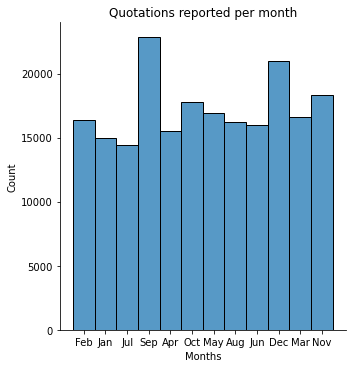

In [10]:
sns.displot(quotes_all_years['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

### We then select  the quotations reported on peak days 

In [11]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_all_years[quotes_all_years['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]
quotations_peak.reset_index(drop = True, inplace = True)
quotations_peak

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,date_of_birth,nationality,gender,ethnic_group,occupation,party,religion,month
0,2015-11-30-137589,Women of Color Speak Out -- Climate Change and...,None,[],2015-11-30,1,"[[None, 0.9592], [Yin Yu, 0.0408]]",[http://www.nwasianweekly.com/2015/11/presenta...,E,Monday,None,None,None,None,None,None,None,Nov
1,2015-12-01-053425,In an attempt to score a cheap political point...,Tanya Plibersek,[Q7684036],2015-12-01,2,"[[Tanya Plibersek, 0.8804], [None, 0.1196]]",[http://www.news.com.au/national/politics/juli...,E,Tuesday,+1969-12-02T00:00:00Z,Australia,female,None,politician,Australian Labor Party,None,Dec
2,2015-12-01-095724,The climate change that we need is the climate...,Mike Huckabee,[Q158813],2015-12-01,1,"[[Mike Huckabee, 0.7624], [Chris Christie, 0.2...",[http://northjersey.com/news/christie-climate-...,E,Tuesday,+1955-08-24T00:00:00Z,United States of America,male,None,"[radio personality, politician, musician, writer]",Republican Party,Southern Baptist Convention,Dec
3,2015-11-30-138917,You can make a very reasonable argument that c...,Bill Nye,[Q2619019],2015-11-30,3,"[[Bill Nye, 0.7559], [None, 0.1992], [Presiden...",[http://feeds.huffingtonpost.com/c/35496/f/677...,E,Monday,+1955-11-27T00:00:00Z,United States of America,male,None,"[engineer, physicist, educator, writer, actor]",Democratic Party,None,Nov
4,2015-11-30-077809,only acceptable decision by EPA would have bee...,None,[],2015-11-30,1,"[[None, 0.9566], [President Obama, 0.0434]]",[http://pantagraph.com/business/epa-boosts-use...,E,Monday,None,None,None,None,None,None,None,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,2019-09-23-020326,Good intentions and recycled commitments will ...,Winnie Byanyima,[Q21759],2019-09-23,1,"[[Winnie Byanyima, 0.8078], [None, 0.1922]]",[http://www.aljazeera.com/ajimpact/fuel-flames...,E,Monday,+1959-01-13T00:00:00Z,Uganda,female,Ankole,"[engineer, politician, diplomat, entrepreneur,...",Forum for Democratic Change,Catholicism,Sep
6134,2019-09-24-089940,There are many items on the climate change age...,Jerry Brown,"[Q152451, Q717620]",2019-09-24,1,"[[Jerry Brown, 0.603], [None, 0.397]]",[https://www.dailycal.org/2019/09/23/uc-berkel...,E,Tuesday,None,None,None,None,None,None,None,Sep
6135,2019-09-19-048143,"In signing the Paris Agreement, national gover...",Christiana Figueres,[Q518828],2019-09-19,1,"[[Christiana Figueres, 0.7789], [None, 0.2211]]",[https://www.wri.org/news/2019/09/release-new-...,E,Thursday,+1956-08-07T00:00:00Z,Costa Rica,female,None,"[diplomat, economist, politician, climate acti...",National Liberation Party,None,Sep
6136,2019-09-20-062658,"Not only is it a climate crisis, but it's a cl...",Steve Bullock,"[Q24015, Q7612088, Q7612089]",2019-09-20,1,"[[Steve Bullock, 0.7709], [None, 0.2291]]",[https://thehoya.com/day-2-climate-forum-2020-...,E,Friday,None,None,None,None,None,None,None,Sep


## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

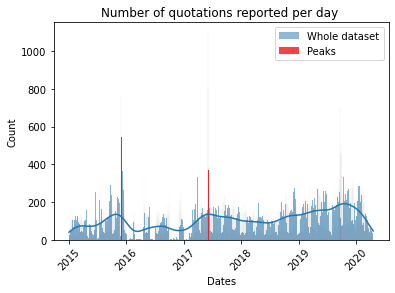

In [127]:
sns.histplot(quotes_all_years['date'],label = "Whole dataset", bins =5*365, kde = True)
sns.histplot(quotations_peak['date'], color = 'red',label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day ')

## sorting

In [167]:
dates_sorted = quotes_norm.sort_values(by=['date']).date
dates_sorted.reset_index(drop = True, inplace = True)

Timestamp('2015-04-06 00:00:00')

## Volume

In [18]:
quotes_2015 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2015")]
quotes_norm_2015 = quotes_norm[quotes_norm.date.astype(str).str.contains("2015")]

quotes_2016 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2016")]
quotes_norm_2016 = quotes_norm[quotes_norm.date.astype(str).str.contains("2016")]

quotes_2017 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2017")]
quotes_norm_2017 = quotes_norm[quotes_norm.date.astype(str).str.contains("2017")]

quotes_2018 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2018")]
quotes_norm_2018 = quotes_norm[quotes_norm.date.astype(str).str.contains("2018")]

quotes_2019 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2019")]
quotes_norm_2019 = quotes_norm[quotes_norm.date.astype(str).str.contains("2019")]

quotes_2020 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains("2020")]
quotes_norm_2020 = quotes_norm[quotes_norm.date.astype(str).str.contains("2020")]



In [257]:
prop_articles_all_years = (len(quotes_all_years['date'].unique()))/len(quotes_norm)
prop_articles_2015 = (len(quotes_2015['date'].unique()))/len(quotes_norm_2015)
prop_articles_2016 = (len(quotes_2016['date'].unique()))/len(quotes_norm_2016)
prop_articles_2017 = (len(quotes_2017['date'].unique()))/len(quotes_norm_2017)
prop_articles_2018 = (len(quotes_2018['date'].unique()))/len(quotes_norm_2018)
prop_articles_2019 = (len(quotes_2019['date'].unique()))/len(quotes_norm_2019)
prop_articles_2020 = (len(quotes_2020['date'].unique()))/len(quotes_norm_2020)

print("The proportion of days where there  is at least one article on climate during the whole study is {:.2%} \n".format(prop_articles_all_years))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2015\n".format(prop_articles_2015))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2016\n".format(prop_articles_2016))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2017\n".format(prop_articles_2017))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2018\n".format(prop_articles_2018))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2019\n".format(prop_articles_2019))
print("The proportion of days where there  is at least one article on climate  is {:.2%}  in 2020".format(prop_articles_2020))



The proportion of days where there  is at least one article on climate during the whole study is 97.47% 

The proportion of days where there  is at least one article on climate  is 99.73%  in 2015

The proportion of days where there  is at least one article on climate  is 89.07%  in 2016

The proportion of days where there  is at least one article on climate  is 97.81%  in 2017

The proportion of days where there  is at least one article on climate  is 100.00%  in 2018

The proportion of days where there  is at least one article on climate  is 100.00%  in 2019

The proportion of days where there  is at least one article on climate  is 100.00%  in 2020


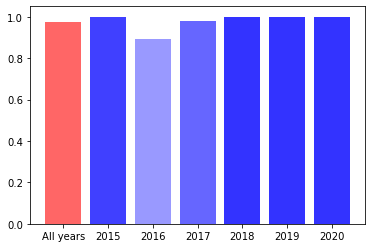

In [253]:
plt.bar("All years",prop_articles_all_years, color = 'red', alpha = 0.6)
ax = plt.bar('2015',prop_articles_2015, color = 'blue', alpha = 0.75)
ax = plt.bar('2016',prop_articles_2016, color = 'blue', alpha = 0.4)
ax = plt.bar('2017',prop_articles_2017,color = 'blue',alpha = 0.6 )
ax = plt.bar('2018',prop_articles_2018,color = 'blue', alpha = 0.8)
ax = plt.bar('2019',prop_articles_2019,color = 'blue', alpha = 0.8)
ax = plt.bar('2020',prop_articles_2020,color = 'blue', alpha = 0.8)


56872                   Australia
56873    United States of America
56874                        None
56875    United States of America
56876                    Portugal
                   ...           
96157                        None
96158                        None
96159                        None
96160    United States of America
96161                        None
Name: nationality, Length: 39290, dtype: object

## Trump

In [259]:
quotes_Trump_Paris_Agreement = quotes_all_years[quotes_all_years['date'].astype(str) == '2017-06-02']
quotes_month_Trump_Paris_Agreement = quotes_2017[pd.to_datetime(quotes_2017.date).dt.month == 6]
                                                                                                    

Text(0.5, 1.0, 'Number of quotations reported per day for the month of June')

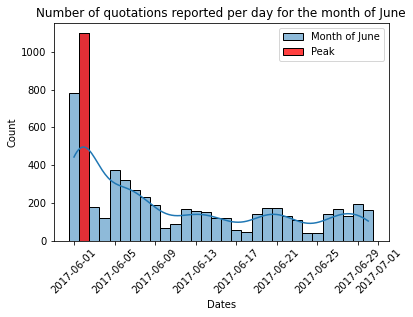

In [260]:
sns.histplot(quotes_month_Trump_Paris_Agreement['date'],label = "Month of June", bins =len(quotes_month_Trump_Paris_Agreement), kde = True)
sns.histplot(quotes_Trump_Paris_Agreement['date'], color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day for the month of June')

In [261]:
index_date_trump = dates_sorted[dates_sorted == '2017-06-02'].index[0]
min_trump = index_date_trump-7
max_trump = index_date_trump+7-1
date_min_trump = dates_sorted[min_trump]
date_max_trump = dates_sorted[max_trump]

interval_week_trump = quotes_all_years[(quotes_all_years['date'] >= date_min_trump) & 
                 (quotes_all_years['date'] <= date_max_trump)]


Text(0.5, 1.0, 'Number of quotations reported per day')

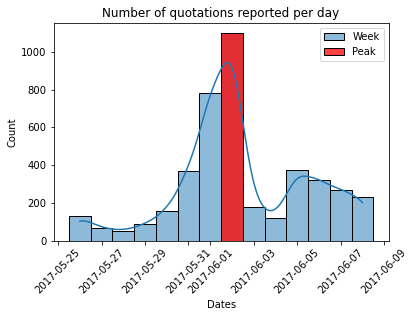

In [275]:
sns.histplot(interval_week_trump['date'],label = "Week", bins =len(interval_week_trump), kde = True)
sns.histplot(interval_week_trump[interval_week_trump['date'].astype(str) =='2017-06-02'].date, color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day')


## COP21

In [263]:
quotes_cop21 = quotes_all_years[quotes_all_years['date'].astype(str).str.contains('2015-11-30')]
quotes_month_cop21= quotes_2015[pd.to_datetime(quotes_2015.date).dt.month == 11 ]                                                                                               

Text(0.5, 1.0, 'Number of quotations reported per day for the month of November ')

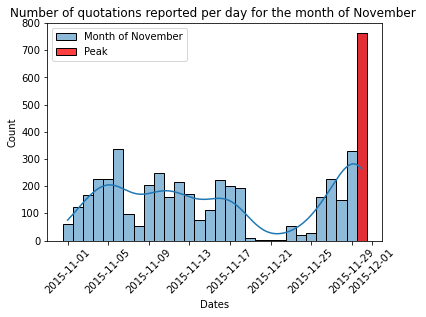

In [264]:
sns.histplot(quotes_month_cop21['date'],label = "Month of November", bins =len(quotes_month_cop21), kde = True)
sns.histplot(quotes_cop21['date'], color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day for the month of November ')

In [265]:
index_date_cop_21 = dates_sorted[dates_sorted == '2015-11-30'].index[0]
min_21 = index_date_cop_21-7
max_21 = index_date_cop_21+7-1
date_min_21 = dates_sorted[min_21]
date_max_21 = dates_sorted[max_21]

interval_week_cop_21 = quotes_all_years[(quotes_all_years['date'] >= date_min_21) & 
                 (quotes_all_years['date'] <= date_max_21)]


Text(0.5, 1.0, 'Number of quotations reported per day ')

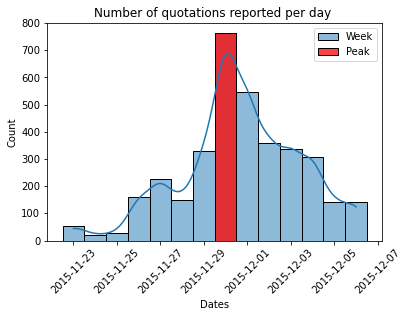

In [266]:
sns.histplot(interval_week_cop_21['date'],label = "Week", bins =len(interval_week_cop_21), kde = True)
sns.histplot(interval_week_cop_21[interval_week_cop_21['date'].astype(str) =='2015-11-30'].date, color = 'red',label = "Peak") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day ')